# MNIST Dataset
## digit_detection

https://www.youtube.com/watch?v=E_ZvKXTXmi4&list=PLs74m7pSWiuuc0e4diBN-b1o5gX8ucaiW&index=9

In [1]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
mnist = keras.datasets.mnist

In [3]:
(train_featurs, train_labels), (test_featurs, test_labels) = mnist.load_data()

In [4]:
train_featurs.shape

(60000, 28, 28)

In [5]:
test_featurs.shape

(10000, 28, 28)

7


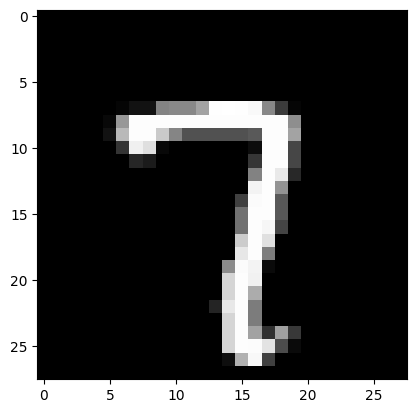

In [6]:
idx = 2024
img = train_featurs[idx]

print(train_labels[idx])

plt.gray()
plt.imshow(img)

In [7]:
np.min(img), np.max(img)

(0, 255)

In [8]:
train_featurs = train_featurs / 255.0
test_featurs = test_featurs / 255.0

# model definition

In [9]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(units = 10, activation = 'softmax'))

In [10]:
model.compile(optimizer=tf.optimizers.Adam(), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [11]:
model.build(input_shape = (None, 28,28))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
hist = model.fit(train_featurs,train_labels, epochs = 300, batch_size = 256, validation_data = (test_featurs, test_labels))

Epoch 1/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.8009 - loss: 0.7363 - val_accuracy: 0.9434 - val_loss: 0.1965
Epoch 2/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9503 - loss: 0.1729 - val_accuracy: 0.9602 - val_loss: 0.1311
Epoch 3/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9652 - loss: 0.1171 - val_accuracy: 0.9676 - val_loss: 0.1079
Epoch 4/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9751 - loss: 0.0838 - val_accuracy: 0.9724 - val_loss: 0.0939
Epoch 5/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9795 - loss: 0.0673 - val_accuracy: 0.9726 - val_loss: 0.0936
Epoch 6/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9834 - loss: 0.0549 - val_accuracy: 0.9759 - val_loss: 0.0790
Epoch 7/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9872 - loss: 0.0430 - val_accuracy: 0.9768 - val_loss: 0.0745
Epoch 8/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9882 - loss: 0.0379 - val_

In [13]:
model.evaluate(test_featurs, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9765 - loss: 0.2944


[0.24438251554965973, 0.9797999858856201]

In [14]:
idx = 100
img = test_featurs[idx]
print(test_labels[idx])

6


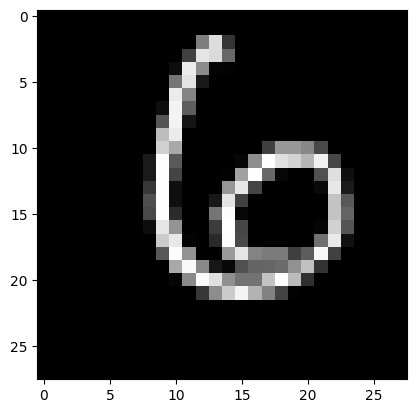

In [15]:
plt.gray()
plt.imshow(img)

In [16]:
#test_data = np.reshape(img, (-1, 784))
test_data = np.reshape(img, (1, 28, 28))

test_data.shape

(1, 28, 28)

In [17]:
model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


array([[4.7502975e-25, 3.9052623e-28, 2.6578871e-30, 0.0000000e+00,
        1.4568090e-36, 2.7843455e-24, 1.0000000e+00, 1.4664129e-32,
        2.8860177e-26, 0.0000000e+00]], dtype=float32)

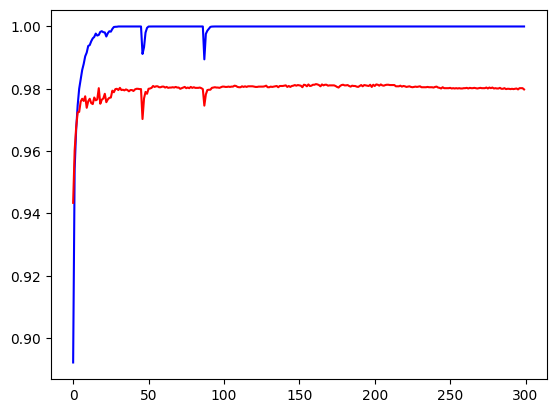

In [18]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

plt.plot(acc, color = 'blue')
plt.plot(val_acc, color = 'red')

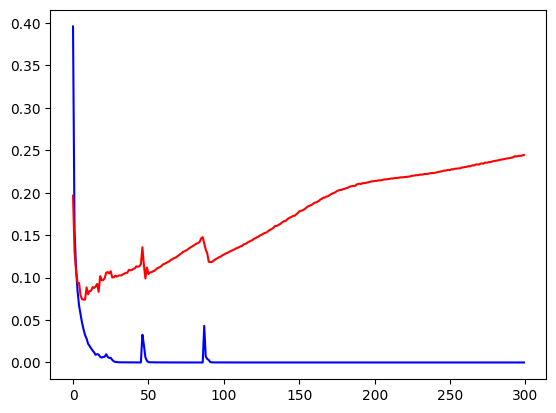

In [19]:
acc = hist.history['loss']
val_acc = hist.history['val_loss']

plt.plot(acc, color = 'blue')
plt.plot(val_acc, color = 'red')